# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
data = data.drop(['osm'], axis=1).sample(10000)
data.head()

,lat,lon,alt
76821,8.745731,56.726074,17.136679
102437,9.959297,57.569385,24.897437
311836,9.853550,57.500834,8.316241
393392,10.111867,57.189482,19.303181
219131,10.291615,56.735965,3.841424


In [3]:
# Define range of min_samples and epsilon
min_samples_range = range(1, 11)
epsilon_range = np.arange(0.05, 0.51, 0.01)

# Initialize 2D array to store Silhouette Coefficients
sil_scores = np.zeros((len(min_samples_range), len(epsilon_range)))

In [6]:
# Iterate over min_samples and epsilon values
for i, min_samples in enumerate(min_samples_range):
    for j, epsilon in enumerate(epsilon_range):
        # Cluster the data using DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Calculate Silhouette Coefficient
        if len(np.unique(labels)) > 1:  # Silhouette Coefficient is only defined if there are at least 2 clusters
            sil_score = silhouette_score(data, labels)
            sil_scores[i, j] = sil_score

<IPython.core.display.Javascript object>


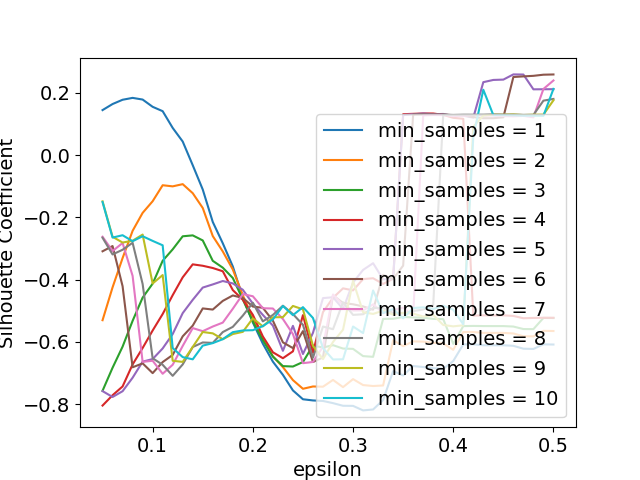

IndexError: index 45 is out of bounds for axis 0 with size 10

In [7]:
# Plot the Silhouette Coefficient values for each combination of min_samples and epsilon
for i, min_samples in enumerate(min_samples_range):
    plt.plot(epsilon_range, sil_scores[i, :], label=f"min_samples = {min_samples}")
plt.xlabel('epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend()

# Plot epsilon vs sil_score for the best min_samples value
best_min_samples = np.argmax(np.mean(sil_scores, axis=0)) + 1  # find the min_samples value with highest average Silhouette Coefficient
best_sil_scores = sil_scores[best_min_samples-1, :]
plt.figure()
plt.plot(epsilon_range, best_sil_scores)
plt.xlabel('epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title(f"min_samples = {best_min_samples}")
plt.show()


## The closer the Silhouette Coefficient is to 1, the better... so the ideal for this dataset is min samples of 6 and an epsilon of 0.5.

In [ ]:
#all_scores = []
#for min_sample in min_samples:
#    scores = []
#    for epsilon in epsilons:
#        
#        
        # calculate silouette score here
#        score = 
#        
#        scores.append(score)
#        
#    all_scores.append(scores)

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

## Daesh.csv is a dataset of Islamic State affiliated Twitter accounts. The content of the tweets and user reported locations (in the bio, not the metadata) have been truncated. 

EDIT 1: I thought I was going to reveal something cool with ISIS tweets and time stamps by (encoded) usernames and then guess their location... but it just clustered around the names. This took a little while to reveal too, and... I think it's OK, and I learned a lot this week. I ran it two ways.

EDIT 2: I'm glad I slept on it and came back with a toy dataset (Star Wars). It works now.

### First try using PCA... partial credit?

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load data into a pandas dataframe
df = pd.read_csv('daesh.csv')

# Remove labels column if it exists
if 'labels' in df.columns:
    data = df.drop('labels', axis=1).values
else:
    data = df.values

In [75]:
# Check it out
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17410 entries, 0 to 17409
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            17410 non-null  object
 1   username        17410 non-null  object
 2   followers       17410 non-null  int64 
 3   numberstatuses  17410 non-null  int64 
 4   time            17410 non-null  object
 5   Unnamed: 5      111 non-null    object
 6   Unnamed: 6      15 non-null     object
 7   Unnamed: 7      4 non-null      object
 8   Unnamed: 8      2 non-null      object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB
None


In [76]:
# Convert the 'time' column to datetime object
df['time'] = pd.to_datetime(df['time'])

print(df.dtypes)

name                      object
username                  object
followers                  int64
numberstatuses             int64
time              datetime64[ns]
Unnamed: 5                object
Unnamed: 6                object
Unnamed: 7                object
Unnamed: 8                object
dtype: object


In [77]:
# Fill in any missing values
df.fillna(method='ffill', inplace=True)

In [78]:
# Encode the 'username' column
le = LabelEncoder()
df['username_encoded'] = le.fit_transform(df['username'])

# Drop any columns that are not relevant to the analysis
df.drop(['name', 'username', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
print(df.dtypes)

followers                    int64
numberstatuses               int64
time                datetime64[ns]
username_encoded             int64
dtype: object


In [79]:
# Convert the 'time' column again
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].astype(int) // 10**9

In [80]:
# Apply PCA 
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df)

In [81]:
# Cluster the data w/ DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_pca)

In [82]:
# Get silhouette coefficient
sil_score = silhouette_score(data_pca, labels)
print(f"Silhouette Coefficient: {sil_score}")

Silhouette Coefficient: -0.8849856690177883


In [93]:
# 2D and 3D plots... they go rignt on top of each other for some reason
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
#ax1.set_xlabel('PC 1')
#ax1.set_ylabel('PC 2')

#ax2 = fig.add_subplot(111, projection='3d')
#ax2.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels, cmap='viridis')
#ax2.set_xlabel('PC 1')
#ax2.set_ylabel('PC 2')
#ax2.set_zlabel('PC 3')

#plt.show()


<IPython.core.display.Javascript object>


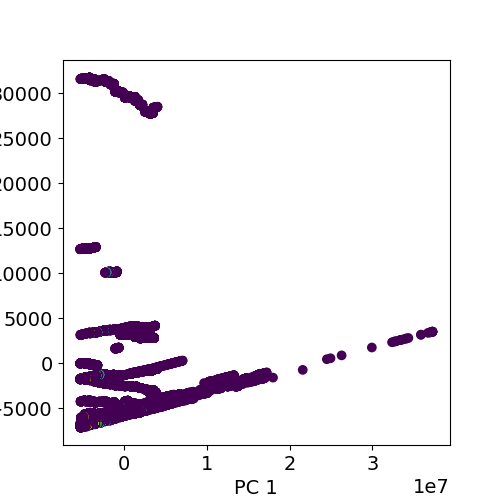

Text(0, 0.5, 'PC 2')

In [91]:
# 2D plot of the clustered data
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')

<IPython.core.display.Javascript object>


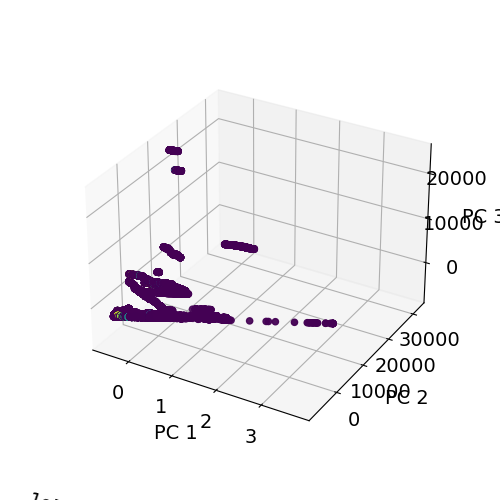

In [92]:
# 3D plot of the clustered data
fig = plt.figure(figsize=(5, 5))
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels, cmap='viridis')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.show()

### Second try, exactly as in #1

<IPython.core.display.Javascript object>


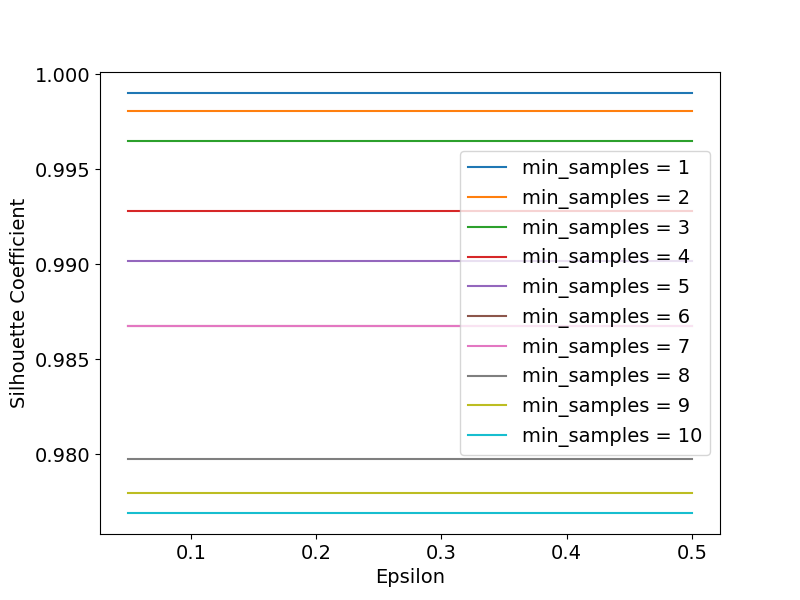

In [95]:
# Load data into a dataframe
df2 = df.copy()

# Convert the 'time' column to Unix timestamps
df2['time'] = pd.to_datetime(df['time'])
df2['time'] = df2['time'].astype(int) // 10**9

# Define the range of values for min_samples and epsilon
min_samples_range = range(1, 11)
epsilon_range = np.arange(0.05, 0.51, 0.01)

# Initialize a 2D array to store the Silhouette Coefficient values
sil_coeff = np.zeros((len(min_samples_range), len(epsilon_range)))

# Iterate through different values of min_samples and epsilon
for i, min_samples in enumerate(min_samples_range):
    for j, epsilon in enumerate(epsilon_range):
        # Cluster the data using DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(df2)
        
        # Calculate the Silhouette Coefficient for the current combination of parameters
        sil_coeff[i, j] = silhouette_score(df2, labels)
        
# Generate a plot of epsilon vs. sil_score
fig, ax = plt.subplots(figsize=(8, 6))
for i, min_samples in enumerate(min_samples_range):
    ax.plot(epsilon_range, sil_coeff[i], label=f"min_samples = {min_samples}")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Silhouette Coefficient')
ax.legend()
plt.show()


### Hmmm... it looks like it just clustered around usernames. 

# Third try, using that lame Star Wars dataset...

In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
# Get Star Wars
sw_df = pd.read_csv('star_wars.csv')
features = ['height', 'mass', 'birth_year', 'homeworld', 'species']
X = sw_df[features].dropna()

In [99]:
# Encode homeworld and species
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
X['homeworld'] = encoder.fit_transform(X['homeworld'])
X['species'] = encoder.fit_transform(X['species'])

scaler = StandardScaler()
X[['height', 'mass', 'birth_year']] = scaler.fit_transform(X[['height', 'mass', 'birth_year']])

In [100]:
# Do PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [101]:
# What about K Means?
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)

/Users/test/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


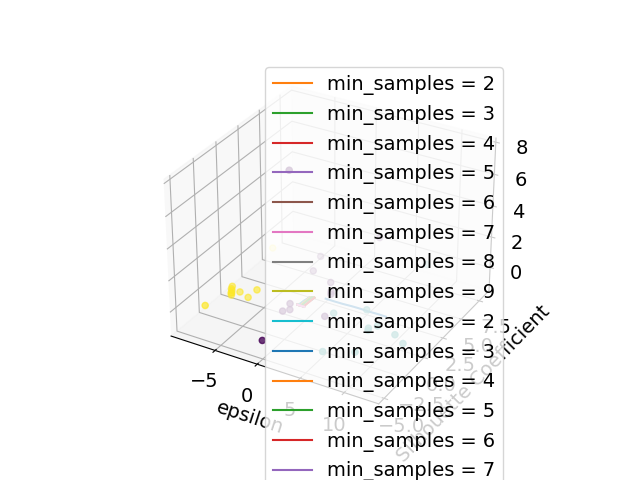

In [102]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=kmeans.labels_)
plt.show()

In [103]:
# Get Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(X_pca, kmeans.labels_)

0.4604286631821749

In [106]:
# Metric evaluation plot
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# New Star Wars df
sw_df = pd.read_csv('star_wars.csv')
features = ['height', 'mass', 'birth_year', 'homeworld', 'species']
X = sw_df[features].dropna()
encoder = LabelEncoder()
X['homeworld'] = encoder.fit_transform(X['homeworld'])
X['species'] = encoder.fit_transform(X['species'])
scaler = StandardScaler()
X[['height', 'mass', 'birth_year']] = scaler.fit_transform(X[['height', 'mass', 'birth_year']])

In [107]:
# Define ranges for epsilon and min_samples
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)

In [108]:
# Compute Silhouette Coefficient values for different combos
sil_scores = np.zeros((len(min_samples_range), len(eps_range)))
for i, min_samples in enumerate(min_samples_range):
    for j, eps in enumerate(eps_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1
        sil_scores[i, j] = score

In [111]:
# Silhouette Coefficient values for each combo
for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, sil_scores[i, :], label=f"min_samples = {min_samples}")
plt.xlabel('epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend()

<IPython.core.display.Javascript object>


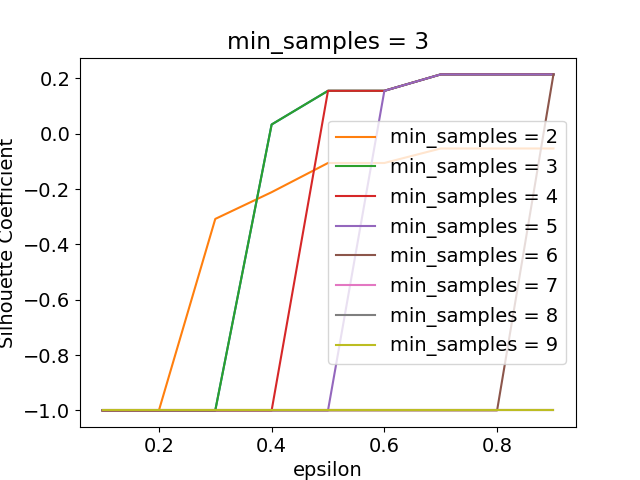

In [110]:
# Plot epsilon vs sil_score for the best min_sample
best_min_samples = np.argmax(np.mean(sil_scores, axis=1)) + 2
best_sil_scores = sil_scores[best_min_samples-2, :]
plt.figure()
plt.plot(eps_range, best_sil_scores)
plt.xlabel('epsilon')
plt.ylabel('Silhouette Coefficient')
plt.title(f"min_samples = {best_min_samples}")
plt.show()